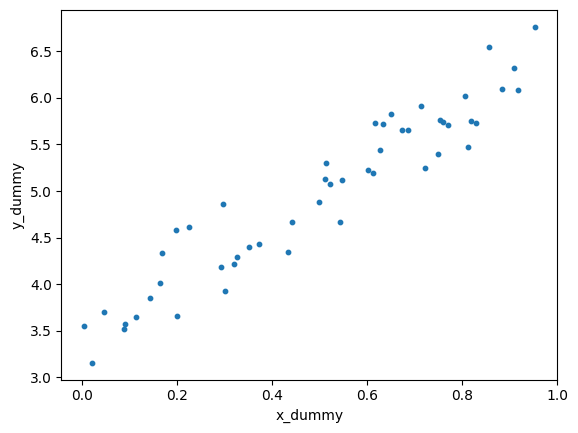

Mean Squared Error :  0.0746314112910216
R-Squared : 0.9068822972556425
Y-intercept : [3.41354381]
Slope : [[3.11024701]]


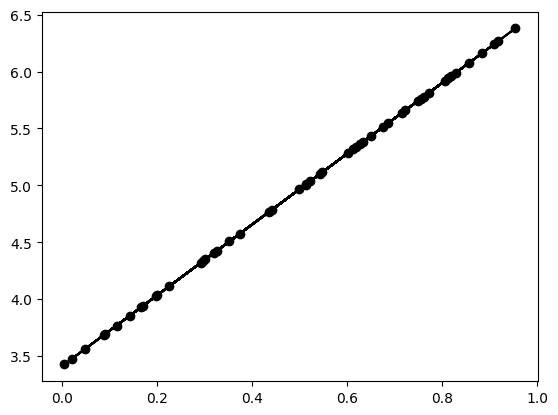

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# creating a dummy dataset
np.random.seed(10)
x = np.random.rand(50, 1)
y = 3 + 3 * x + np.random.rand(50, 1)


#scatterplot

plt.scatter(x,y,s=10)
plt.xlabel('x_dummy')
plt.ylabel('y_dummy')
plt.show()

#creating a model
from sklearn.linear_model import LinearRegression

# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(x, y)

#using the training dataset for the prediction
pred = regressor.predict(x)

#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
plt.plot(x, pred, color = 'Black', marker = 'o')


#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Input Data')
plt.show()

# Instantiate KMeans model
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters
y_kmeans = kmeans.predict(X)

# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plotting the centroids of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X_labeled = iris.data
y_labeled = iris.target

# Generate a larger pool of unlabeled data (you can choose to replicate the labeled data for this example)
X_unlabeled = np.concatenate([X_labeled, X_labeled])
y_unlabeled = np.concatenate([y_labeled, np.full_like(y_labeled, -1)])  # Using -1 as placeholder for unlabeled data

# Split the labeled data into train and test sets
X_train_labeled, X_test_labeled, y_train_labeled, y_test_labeled = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Initialize a logistic regression model with a higher max_iter value
model = LogisticRegression(max_iter=1000)

# Train the model on the small labeled dataset
model.fit(X_train_labeled, y_train_labeled)

# Use the model to predict labels for the unlabeled data
pseudo_labels = model.predict(X_unlabeled)
X_pseudo_labeled = X_unlabeled[pseudo_labels != -1]
y_pseudo_labeled = pseudo_labels[pseudo_labels != -1]

# Combine the pseudo-labeled data with the original labeled data
X_combined = np.vstack((X_labeled, X_pseudo_labeled))
y_combined = np.concatenate((y_labeled, y_pseudo_labeled))

# Retrain the model on the expanded labeled dataset
model.fit(X_combined, y_combined)

# Evaluate the model on the test set
accuracy = model.score(X_test_labeled, y_test_labeled)
print(f"Accuracy after semi-supervised learning: {accuracy}")
